In this starting kernel you can see some examples of the Countries where the Terrorism has occured:

from The Global Terrorism Database (GTD). And then there is a discovery of France attacks.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (8,6)
import folium

import numpy as np  
import pandas as pd
pd.set_option("max_columns", None)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("gtd/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', dtype = "object")
#globalterrorismdb_0718dist.csv

In [3]:
df.shape

(181691, 135)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68,Named Civilian,NaN,Julio Guzman,58,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN,Mexico,1,800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54,Radio Journalist/Staff/Facility,Voice of America,Employee,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46,Embassy/Consulate,NaN,U.S. Embassy,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### There are a lot of missing data. 

But I need some of them like latitude and longitude anyway for location purposes later.
Lat lon is not working properly in Folium if there are some mistakes/NaN´s, We will see that then.

In [6]:
#df.dropna(thresh=180000,axis=1).shape

### Resolution follows like this:

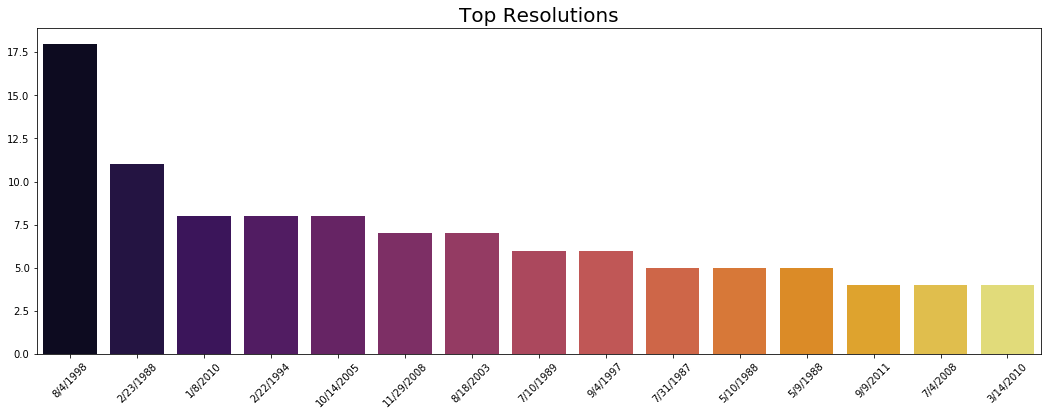

In [7]:
plt.subplots(figsize=(18,6))
sns.barplot(df['resolution'].value_counts()[:15].index,df['resolution'].value_counts()[:15].values,palette='inferno')
plt.xticks(rotation=45)
plt.title('Top Resolutions', size=20)
plt.show()

### Countries of the world which was attacked the most:

In [8]:
#df.country_txt.head(10)#.sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

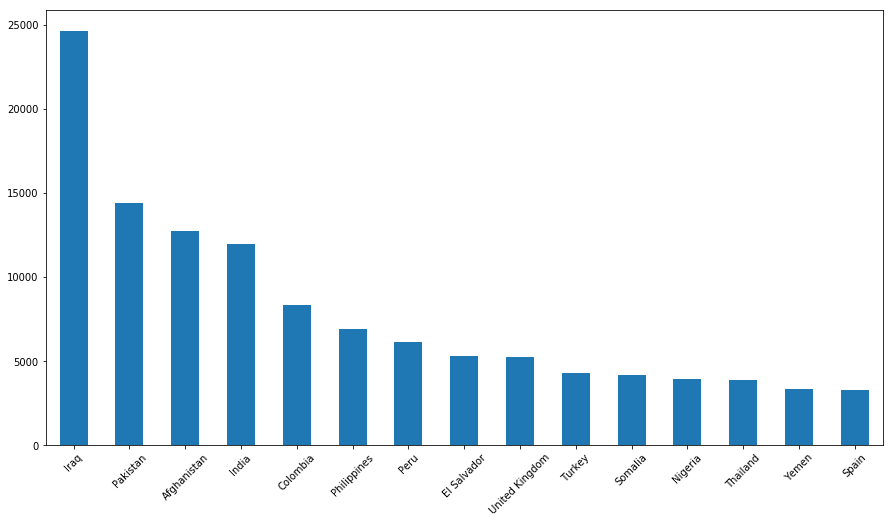

In [9]:
plt.figure(figsize=(15,8))
df.country_txt.value_counts().head(15).plot(kind="bar")
plt.xticks(rotation=45)

### Let´s look at a country in a more colorful manner.

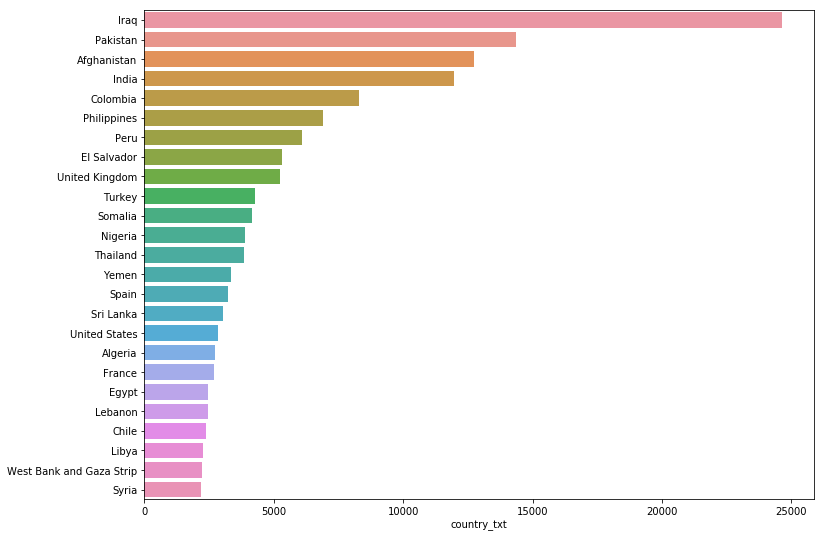

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

sns.barplot(x=df.country_txt.value_counts(), y=df.country_txt.value_counts().index,
            order = df.country_txt.value_counts().iloc[:25].index, orient="h")

### The most attacked provincies of the world

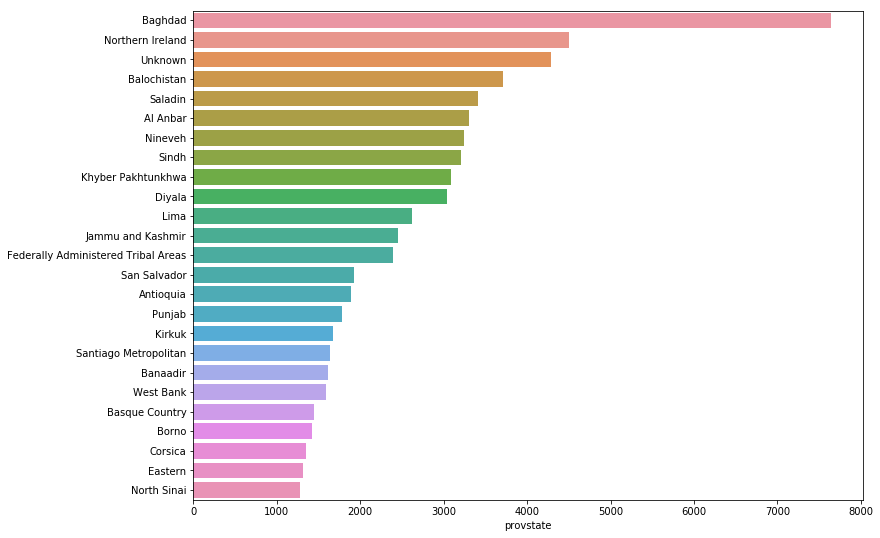

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

sns.barplot(x=df.provstate.value_counts(), y=df.provstate.value_counts().index,
            order = df.provstate.value_counts().iloc[:25].index, orient="h")

### Count of Cities

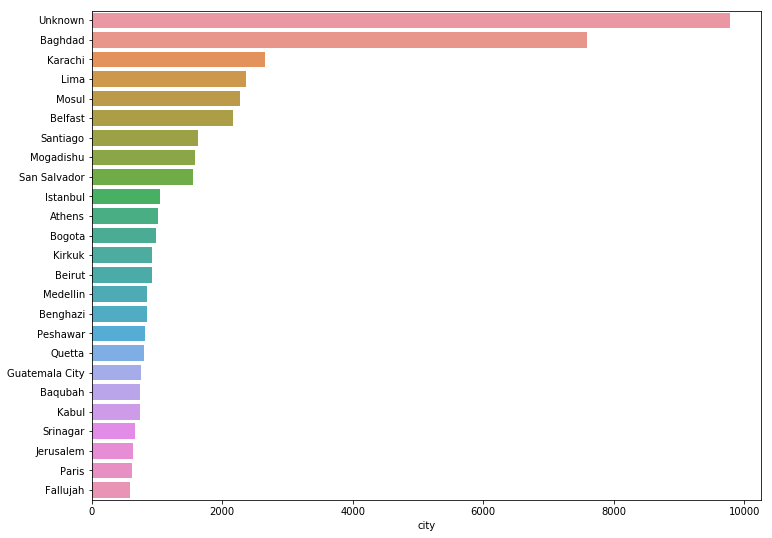

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

sns.barplot(x=df.city.value_counts(), y=df.city.value_counts().index,
            order = df.city.value_counts().iloc[:25].index, orient="h")

### I would like to have a look into some interesting countries in Europe, for example:

## France Attacks

In [13]:
df_t = df[df["country_txt"] == "France"]
df_t.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1301,197205250001,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46,Embassy/Consulate,NaN,US Consulate,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),1000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1302,197205250002,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,43,Airline Officer/Personnel,NaN,Pan Am Offices,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),1000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1303,197205250003,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,11,Entertainment/Cultural/Stadium/Casino,NaN,American Legion,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),2000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1304,197205250004,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,43,Airline Officer/Personnel,NaN,TWA Offices,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### The most attacted Provinces

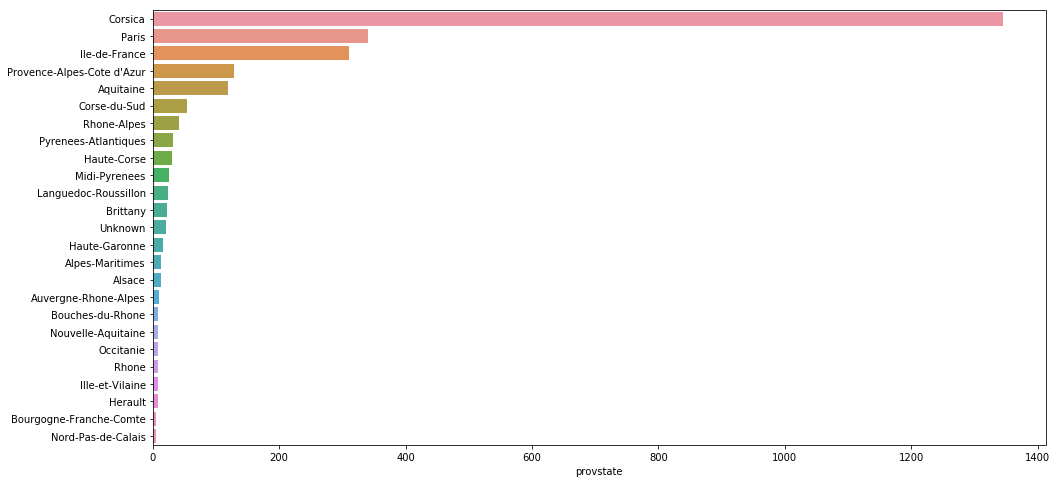

In [14]:
#df_t = df[df["country_txt"] == "France"]
plt.subplots(figsize=(16,8))
sns.barplot(x=df_t.provstate.value_counts(), y=df_t.provstate.value_counts().index,
            order = df_t.provstate.value_counts().iloc[:25].index, orient="h")

### Another look will be on the most attacted Cities of France

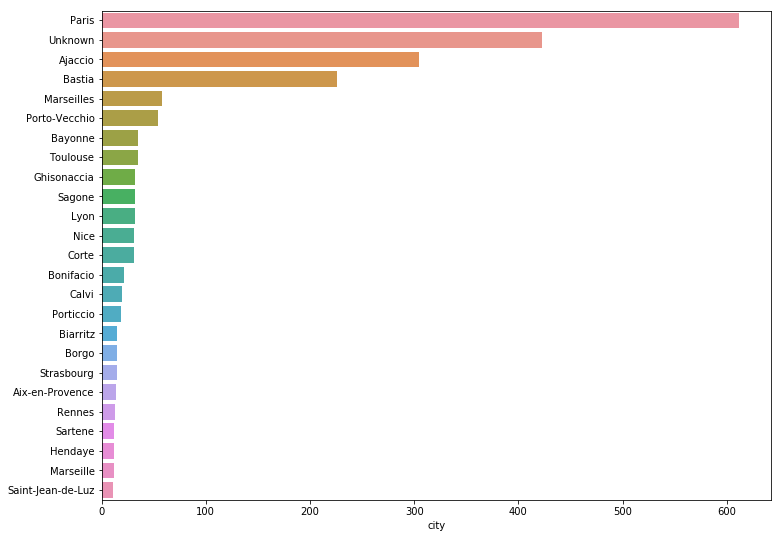

In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

#df_t = df[df["country_txt"] == "France"]

sns.barplot(x=df_t.city.value_counts(), y=df_t.city.value_counts().index,
            order = df_t.city.value_counts().iloc[:25].index, orient="h")

### What are the attack types?

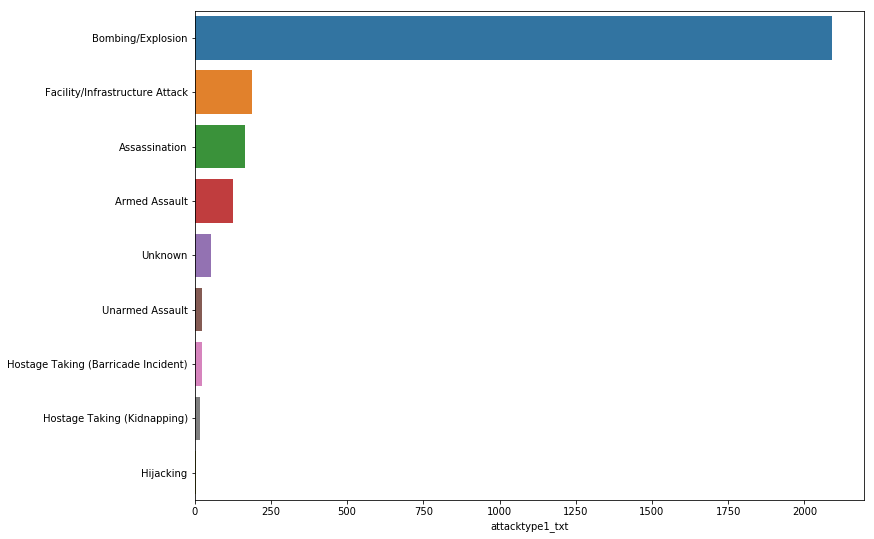

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

#df_t = df[df["country_txt"] == "France"]

sns.barplot(x=df_t.attacktype1_txt.value_counts(), y=df_t.attacktype1_txt.value_counts().index,
            order = df_t.attacktype1_txt.value_counts().iloc[:25].index, orient="h")

### Weapon types are:

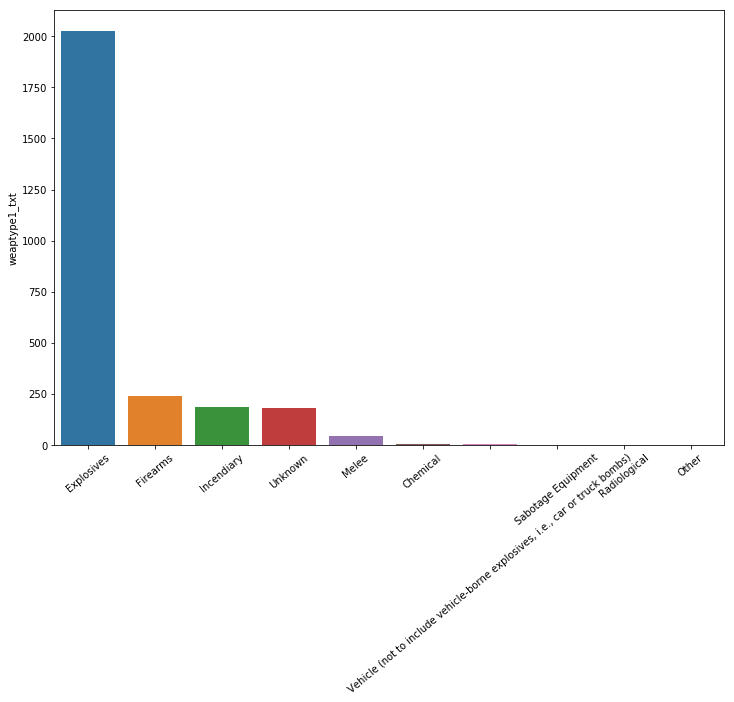

In [17]:
plt.subplots(figsize=(12,8))
plt.xticks(rotation=40)
sns.barplot(x=df_t.weaptype1_txt.value_counts().index, y=df_t.weaptype1_txt.value_counts(),
            order = df_t.weaptype1_txt.value_counts().iloc[:12].index, orient="v")

### What is the most endangered group as a Target?

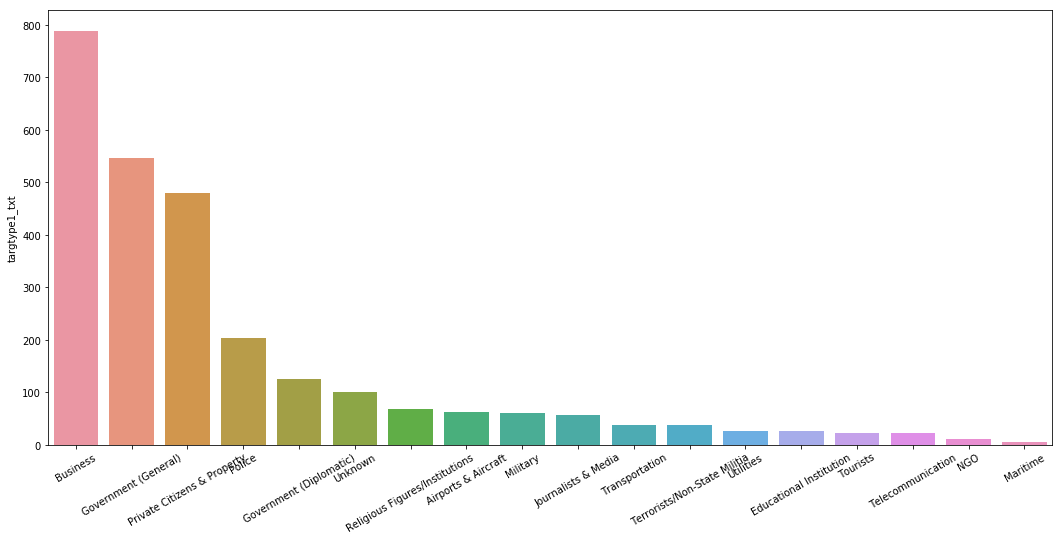

In [18]:
plt.subplots(figsize=(18,8))
plt.xticks(rotation=30)
sns.barplot(x=df_t.targtype1_txt.value_counts().index, y=df_t.targtype1_txt.value_counts(),
            order = df_t.targtype1_txt.value_counts().iloc[:18].index, orient="v") 

### Let´s look at the Number of killed people in France

In [19]:
df_t['nkill'].value_counts()

0     2315
1      139
2       30
3       10
4        6
5        5
93       1
6        1
19       1
15       1
8        1
87       1
9        1
7        1
12       1
Name: nkill, dtype: int64

Text(0.5, 1.0, 'Count of killed people- France')

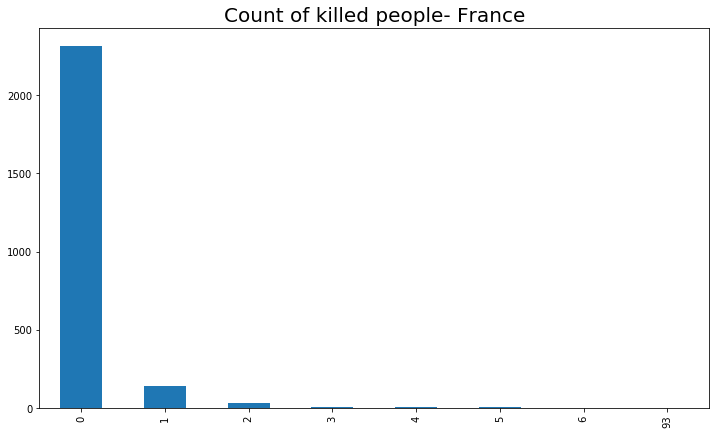

In [20]:
plt.figure(figsize=(12,7))

df_t.nkill.value_counts().head(8).sort_values(ascending=False).plot(kind="bar")
plt.title("Count of killed people- France", size=20)
#plt.xticks(rotation=45)

### Number of wounded is below

In [21]:
df_t['nwound'].value_counts()[:25]

0      2219
1       119
2        40
3        38
4        10
6         9
7         9
5         6
8         5
34        5
18        5
10        4
12        4
26        4
13        4
20        3
28        2
60        2
14        2
15        2
22        1
30        1
55        1
86        1
433       1
Name: nwound, dtype: int64

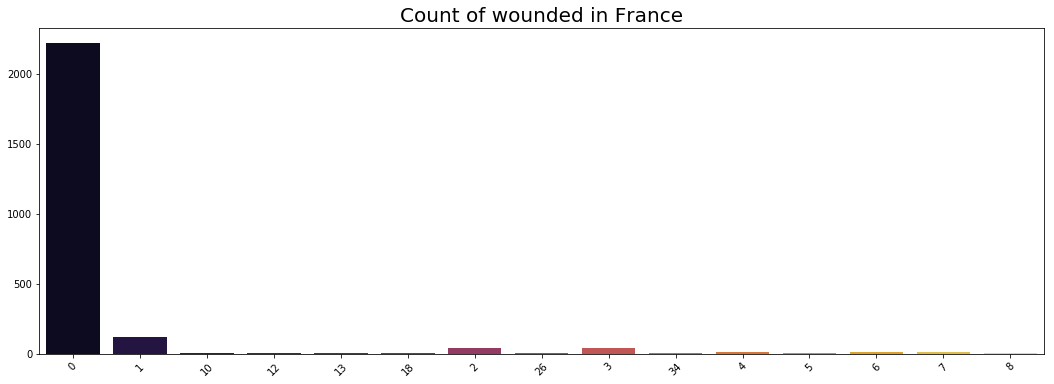

In [22]:
plt.subplots(figsize=(18,6))
sns.barplot(df_t['nwound'].value_counts()[:15].index,df_t['nwound'].value_counts()[:15].values, palette='inferno')
plt.xticks(rotation=45)
plt.title('Count of wounded in France', size=20)
plt.show()

### The greatest Terrorist Groups

In [23]:
df_t.gname.value_counts()[:25]

Unknown                                                                          979
Corsican National Liberation Front (FLNC)                                        637
Corsican National Liberation Front- Historic Channel                             128
Separatists                                                                       84
Resistenza                                                                        73
Corsican Separatists                                                              63
Iparretarrak (IK)                                                                 57
Action Directe                                                                    53
Armenian Secret Army for the Liberation of Armenia                                49
Breton Liberation Front (FLB)                                                     32
Basque Fatherland and Freedom (ETA)                                               28
Jihadi-inspired extremists                                       

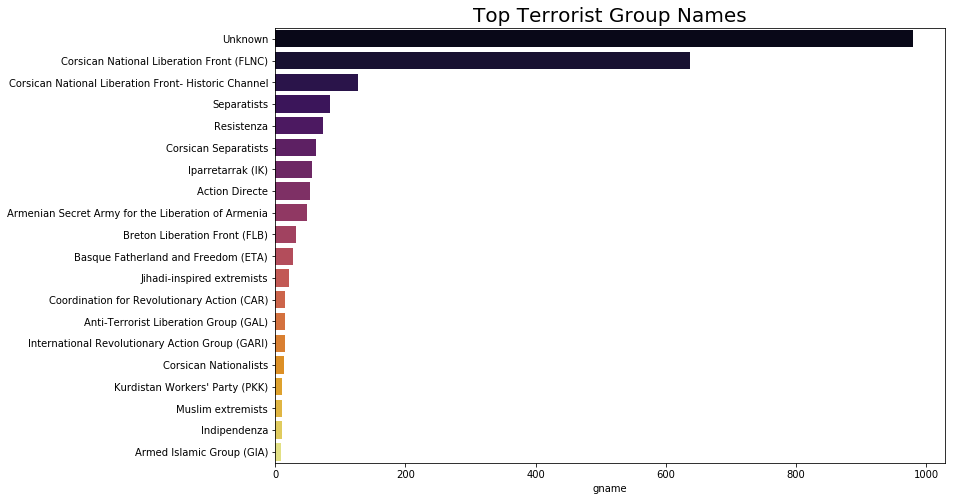

In [24]:
plt.subplots(figsize=(12,8))
sns.barplot(df_t['gname'].value_counts()[:20],df_t['gname'].value_counts()[:20].index,palette='inferno')
plt.title('Top Terrorist Group Names', size=20)
plt.show()

### Terrorist Activities around the World in Years

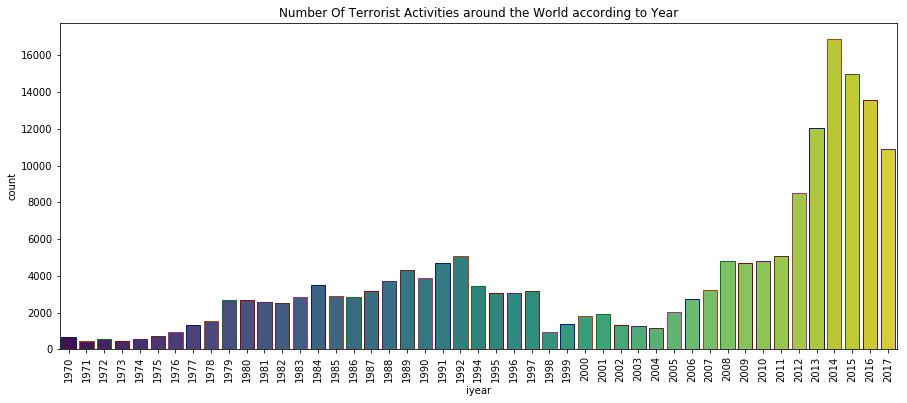

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='viridis',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities around the World according to Year')
plt.show()

### Let´s look at the Number of Terrorist Activities in France

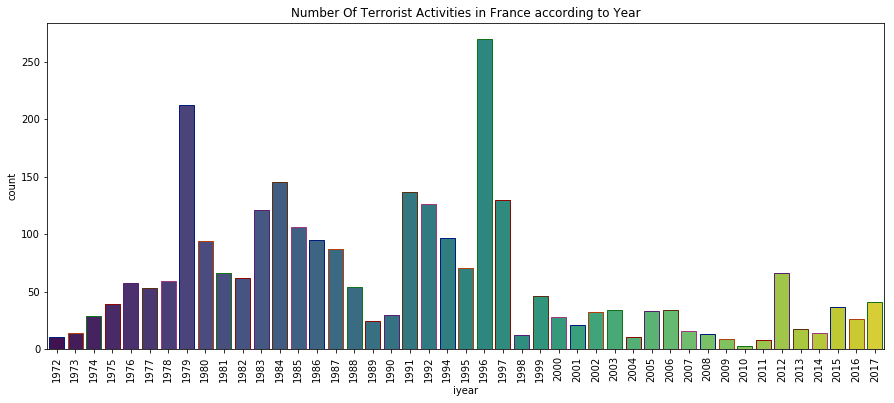

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df_t,palette='viridis',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in France according to Year')
plt.show()

#### As we know from the data:

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

##### I thought that the attacks are increasing in France too in the last several years . 

##### But I was very surprised that according the data this is not the true.

### Number of Terrorist Activities in France by Month

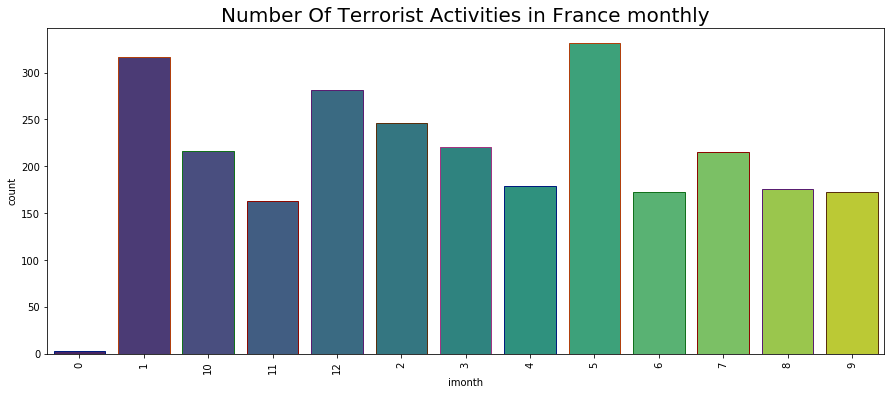

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('imonth',data=df_t,palette='viridis',edgecolor=sns.color_palette('dark',7))#RdYlGn_r
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in France monthly', size=20)
plt.show()

### Other Crimes:

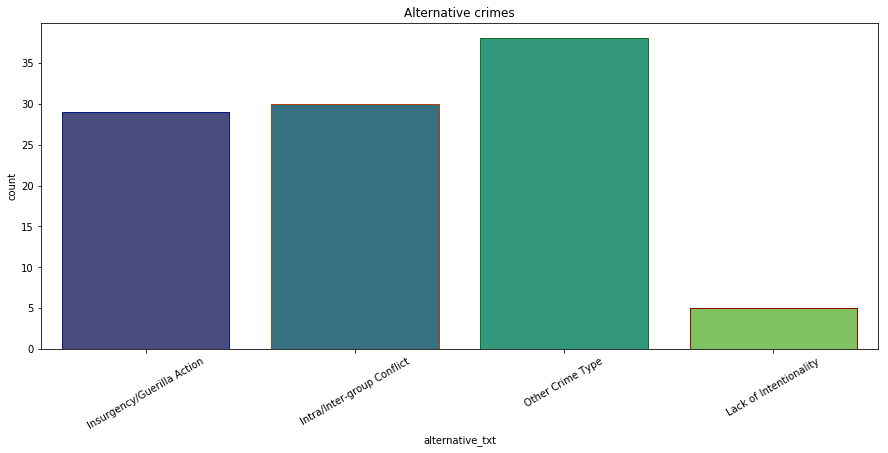

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('alternative_txt',data=df_t,palette='viridis',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=30)
plt.title('Alternative crimes')
plt.show()

### We can look at some of the locations 

Paris is on the first place:

In [29]:
#import folium

fm = folium.Map(location=[48.86,2.32], zoom_start=9)
folium.CircleMarker(location=(48.8603634,2.3208891), popup="Paris").add_to(fm)
fm.save('Paris.html')
fm

### Sample of Terrorist attacks
Firstly I was trying to make a quick and simple analysis for some location. But the code for example below was not working right:

for i in range(0,len(df)):

    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]]).add_to(m)
    
Obviously there are some missing data permanently. For that reason I was adding a location manually.
I will improve that later.
Any suggestions are welcome.

In [30]:
import folium
fm = folium.Map(location=[48.8647, 2.3490], zoom_start=5.3)

folium.Marker(location=(48.856644,2.34233), popup="Paris", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.56214,2.246488), popup="Avrainville", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.798328,2.309902), popup="Bagneux", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.836582,2.23914), popup="Boulogne-Billancourt", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(47.237829,6.024054), popup="Besancon", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.296482,5.36978), popup="Marseilles", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(46.306884,4.828731), popup="Macon", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.885212,2.437678), popup="Romainville", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.416095,-3.832245), popup="Tredudon", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.604652,1.444209), popup="Toulouse", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(42.699997,9.447317), popup="Bastia", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.091463,-0.045726), popup="Lourdes", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.836699,4.360054), popup="Nimes", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.583148, 7.747882), popup="Strasbourg", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(45.764043,4.835659), popup="Lyon", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.359399,-1.766148), popup="Hendaye", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.696036,7.265592), popup="Nice", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(45.648377,0.156237), popup="Angouleme", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(47.997542,-4.097899), popup="Quimper", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(47.914709,7.537626), popup="Fessenheim", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(49.49437,0.107929), popup="Le Havre", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.483152,-1.558626), popup="Biarritz", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(50.692705,3.177847), popup="Roubaix", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(41.930607,8.742907), popup="Ajaccio", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.3533,-3.872203), popup="Brennilis", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.113475,-1.675708), popup="Rennes", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(48.218878,-4.164362), popup="Dineault", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.091463,-0.045726), popup="Lourdes", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(42.567651,8.757222), popup="Calvi", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(41.591369,9.278311), popup="Porto-Vecchio", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(41.387174,9.159269), popup="Bonifacio", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(41.857045,9.399654), popup="Solenzara", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.102976,5.878219), popup="La Seyne-Sur-Mer", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(42.55,8.75), popup="La Vaccaja", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.580418,7.125102), popup="Antibes", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.388051,-1.663055), popup="Saint-Jean-de-Luz", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(42.309409,9.149022), popup="Corte", icon=folium.Icon(color="green")).add_to(fm)
folium.Marker(location=(43.481402,-1.514699), popup="Anglet", icon=folium.Icon(color="green")).add_to(fm)


fm.save('Terrorist Events.html')
fm

##### Then I found some inspiration in this kernel:

Global Terrorism EDA in Indonesia

https://www.kaggle.com/arifkurniawan/global-terrorism-eda-in-indonesia

In [31]:
#import folium 
from folium import plugins
from folium.plugins import HeatMap
df_t = df_t[df_t.country_txt=='France'].reset_index(drop=True)

In [32]:
df_t.city.value_counts()[:50]

Paris                        612
Unknown                      423
Ajaccio                      305
Bastia                       226
Marseilles                    58
Porto-Vecchio                 54
Bayonne                       35
Toulouse                      35
Ghisonaccia                   32
Sagone                        32
Lyon                          32
Nice                          31
Corte                         31
Bonifacio                     22
Calvi                         20
Porticcio                     19
Biarritz                      15
Borgo                         15
Strasbourg                    15
Aix-en-Provence               14
Rennes                        13
Sartene                       12
Hendaye                       12
Marseille                     12
Saint-Jean-de-Luz             11
Propriano                     11
L'Ile-Rousse                  11
Tiuccia                       10
Anglet                        10
Furiani                        9
Montpellie

### The most attacked are 5 cities:

Paris, Ajaccio, Bastia, Marseille, and Porto-Vecchio (except Unknown)

In [33]:
def heatmaps(kind):
    fig,ax=plt.subplots(figsize=(20,15),nrows=2,ncols=2)
    for i in range(2):
        for j in range(2):
            if i==0 and j==0:
                cities = 'Paris'
            elif i==0 and j==1:
                cities = "Ajaccio"
            elif i==1 and j==0:
                cities = "Bastia"
            elif i==1 and j==0:
                cities = "Marseilles"
            else:
                cities = "Porto-Vecchio"
                
            france = df_t[df_t['city']==cities]
            france = pd.pivot_table(data=france, values=kind,index='targtype1_txt',
                                    columns='attacktype1_txt',aggfunc=np.sum,fill_value=0)
            france.columns = [i.replace('/','/\n').replace(' ','\n') for i in france.columns]

            sns.heatmap(france, annot=True,ax=ax[i,j],cmap="Blues",linewidths=1)
            ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation = 30,color='b',fontdict={'fontsize':9})
            ax[i,j].set_yticklabels(ax[i,j].get_yticklabels(), rotation = 0,color='b')
            if j!= 1:
                ax[i,j].set_ylabel("Target Attack Type 1",fontdict={'fontweight':'bold'})
            else:
                ax[i,j].set_ylabel("")

            if i==1:
                ax[i,j].set_xlabel("Attack Type 1",fontdict={'fontweight':'bold'})
            else:
                ax[i,j].set_xlabel("")
            ax[i,j].set_title('Attack Type with Its Target in %s'%cities,fontdict = {'fontweight':'bold'})
    fig.suptitle('Top 5 Cities with High Terrorism in France',y=0.93,fontsize=22,weight='bold')
    plt.show()

### We can see a sample of these top areas/cities attacked:

In [34]:
france_map = folium.Map(location=[48.8647, 2.3490], 
#                        tiles = "France Terrorism",
                      zoom_start = 5)

# Add data for heatmp 
f_heatmap = df_t[['latitude','longitude']]
f_heatmap = df_t.dropna(axis=0, subset=['latitude','longitude'])
f_heatmap = [[row['latitude'],row['longitude']] for index, row in f_heatmap.iterrows()]
HeatMap(f_heatmap, radius=10).add_to(france_map)

# Plot!
france_map

## Another example about terorism in the Europian Countries can be Germany:

### Let´s look at Germany

In [35]:
df_g = df[df["country_txt"] == "Germany"]
df_t.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197205250001,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46,Embassy/Consulate,NaN,US Consulate,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),1000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1,197205250002,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,43,Airline Officer/Personnel,NaN,Pan Am Offices,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),1000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2,197205250003,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,11,Entertainment/Cultural/Stadium/Casino,NaN,American Legion,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,3,Minor (likely < $1 million),2000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197205250004,1972,5,25,NaN,0,NaN,69,France,8,Western Europe,Paris,Paris,48.856644,2.34233,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,43,Airline Officer/Personnel,NaN,TWA Offices,217,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGI

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

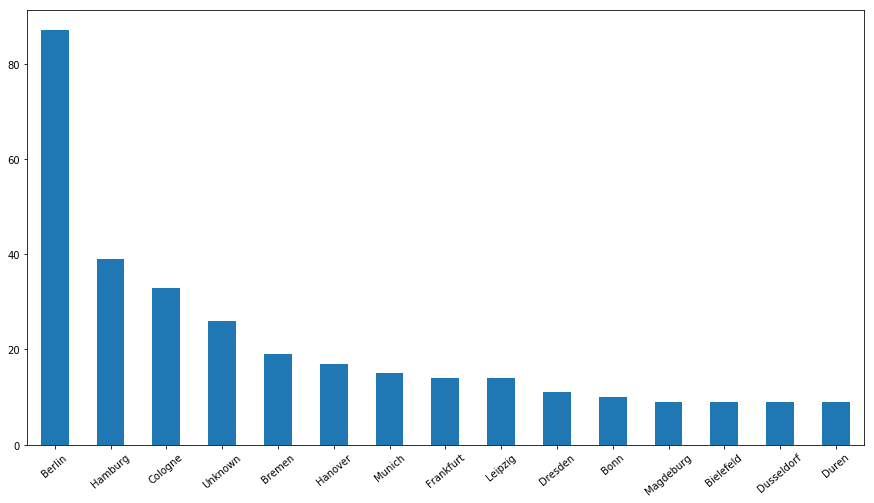

In [36]:
plt.figure(figsize=(15,8))
df_g.city.value_counts().head(15).plot(kind="bar")
plt.xticks(rotation=40)

But more about that later,...